In [1212]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller, kpss
import scipy.stats as stats
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [1213]:
df = pd.read_csv('basket_prices_corr.csv')

In [1214]:
df['Місяць'] = pd.to_datetime(df['Місяць'], format='%Y-M%m')

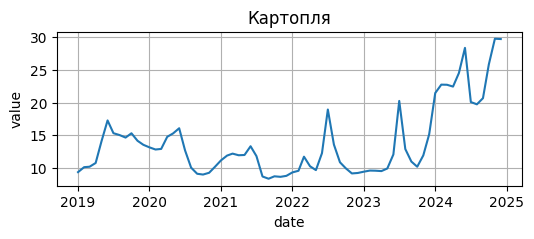

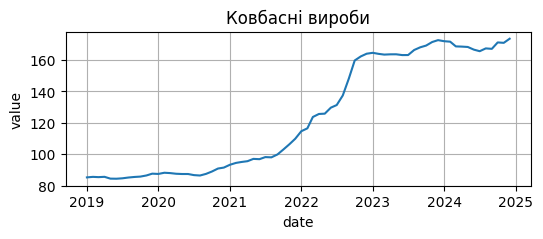

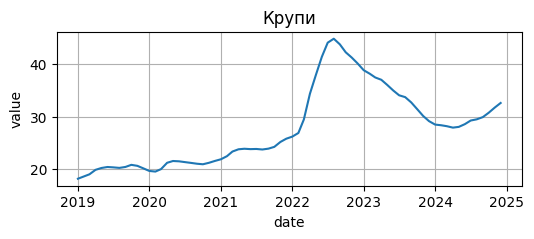

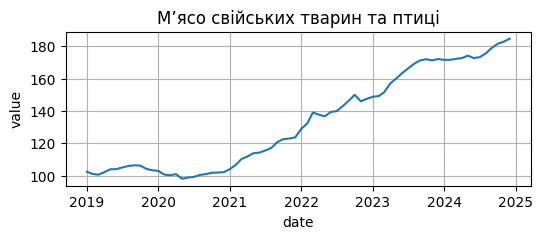

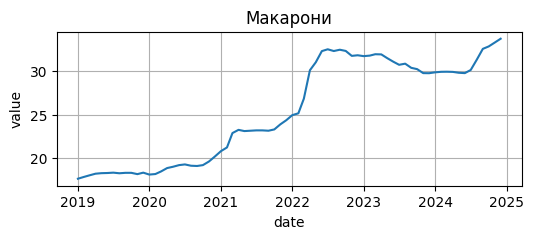

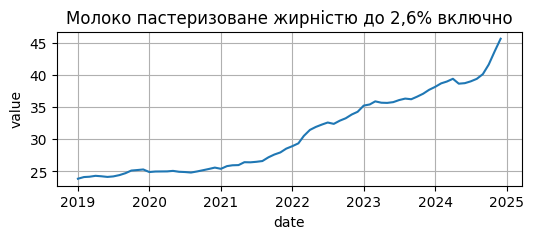

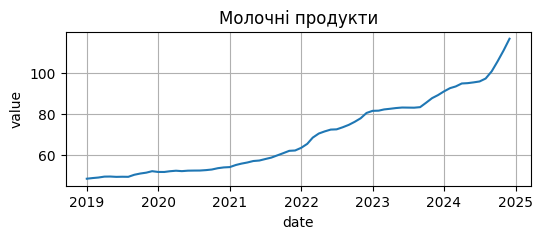

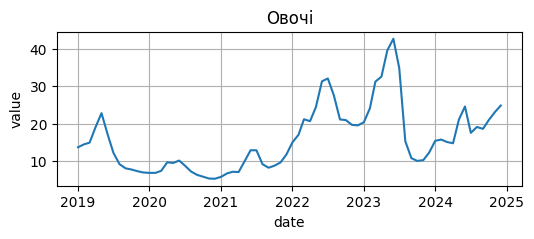

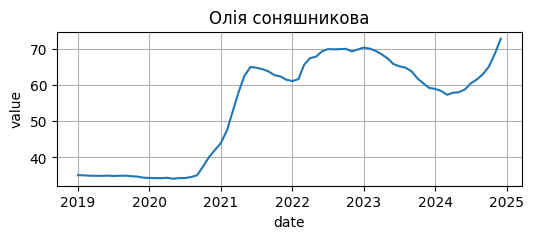

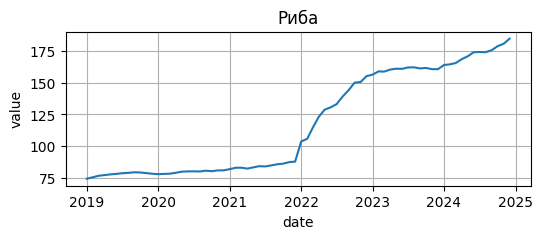

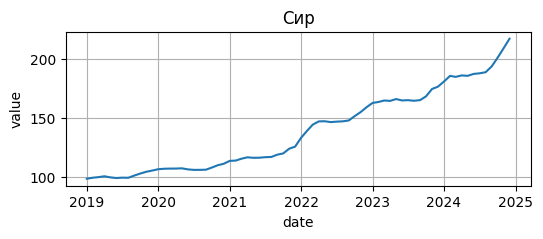

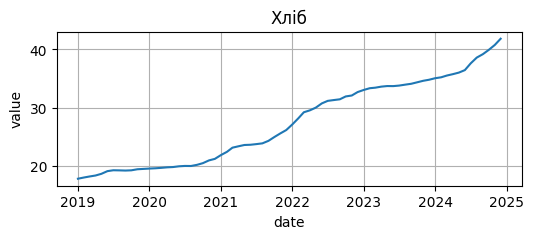

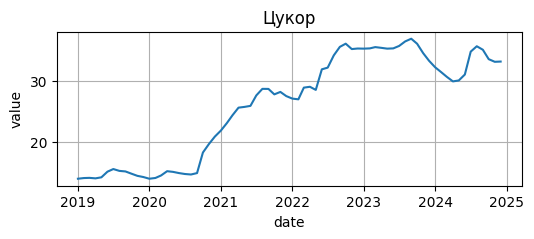

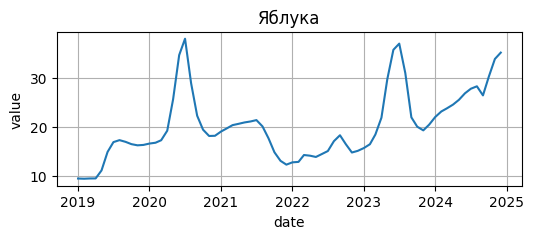

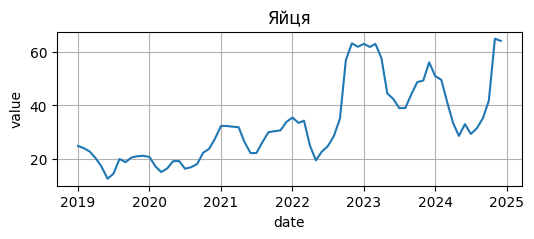

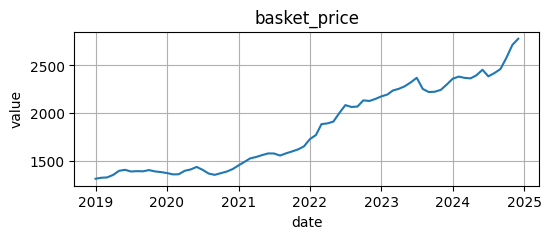

In [1215]:
def plot_all_var(df, ls: list):
    for column in ls:
        plt.figure(figsize=(6, 2))
        plt.plot(df['Місяць'], df[column])
        plt.title(column)
        plt.xlabel('date')
        plt.ylabel('value')
        plt.grid(True)

plot_all_var(df, list(df.columns)[1:])


In [1216]:
df.shape

(72, 17)

In [1217]:
def first_diff(ls: list):
    for column in ls:
        df[f'first_diff_{column}'] = df[column].diff()
first_diff(list(df.columns)[1:])


In [1218]:
def test_stationarity(series, name="Series"):
    series_clean = series.replace([np.inf, -np.inf], np.nan).dropna()
    print(f"\n===={name.upper()}====")
    result_adf = adfuller(series_clean)
    print("ADF-test:")
    print(f"Test statistic: {result_adf[0]}")
    print(f"p-value: {result_adf[1]}")
    print(f"{'stationary' if result_adf[1] < 0.05 else 'non-stationary'}")

    try:
        result_kpss = kpss(series_clean, regression='c', nlags="auto")
        print("\nKPSS-test:")
        print(f"Test statistic: {result_kpss[0]}")
        print(f"p-value: {result_kpss[1]}")
        print(f"{'stationary' if result_kpss[1] > 0.05 else 'non-stationary'}")
    except Exception as e:
        print(f"KPSS test failed: {e}")

In [1219]:
list(df.columns)[17:]

['first_diff_Картопля',
 'first_diff_Ковбасні вироби',
 'first_diff_Крупи',
 'first_diff_Мʼясо свійських тварин та птиці',
 'first_diff_Макарони',
 'first_diff_Молоко пастеризоване жирністю до 2,6% включно',
 'first_diff_Молочні продукти',
 'first_diff_Овочі',
 'first_diff_Олія соняшникова',
 'first_diff_Риба',
 'first_diff_Сир',
 'first_diff_Хліб',
 'first_diff_Цукор',
 'first_diff_Яблука',
 'first_diff_Яйця',
 'first_diff_basket_price']

In [1220]:
for i, col in enumerate(list(df.columns)[17:]):
   test_stationarity(df[col], col)



====FIRST_DIFF_КАРТОПЛЯ====
ADF-test:
Test statistic: -6.242465156526384
p-value: 4.661186970024785e-08
stationary

KPSS-test:
Test statistic: 0.20341601187134564
p-value: 0.1
stationary

====FIRST_DIFF_КОВБАСНІ ВИРОБИ====
ADF-test:
Test statistic: -4.2196889078871385
p-value: 0.0006101197815934728
stationary

KPSS-test:
Test statistic: 0.21159690715221327
p-value: 0.1
stationary

====FIRST_DIFF_КРУПИ====
ADF-test:
Test statistic: -3.4022167084415322
p-value: 0.010883535889303379
stationary

KPSS-test:
Test statistic: 0.11505057481969397
p-value: 0.1
stationary

====FIRST_DIFF_МʼЯСО СВІЙСЬКИХ ТВАРИН ТА ПТИЦІ====
ADF-test:
Test statistic: -6.017652036114782
p-value: 1.5200989549341812e-07
stationary

KPSS-test:
Test statistic: 0.452662471302679
p-value: 0.05445583133505216
stationary

====FIRST_DIFF_МАКАРОНИ====
ADF-test:
Test statistic: -4.382491660563408
p-value: 0.0003187419170189954
stationary

KPSS-test:
Test statistic: 0.0940838841233607
p-value: 0.1
stationary

====FIRST_DIFF_МО

/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_97854/3535282707.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series_clean, regression='c', nlags="auto")
/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_97854/3535282707.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series_clean, regression='c', nlags="auto")
/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_97854/3535282707.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series_clean, regression='c', nlags="auto")
/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipyker

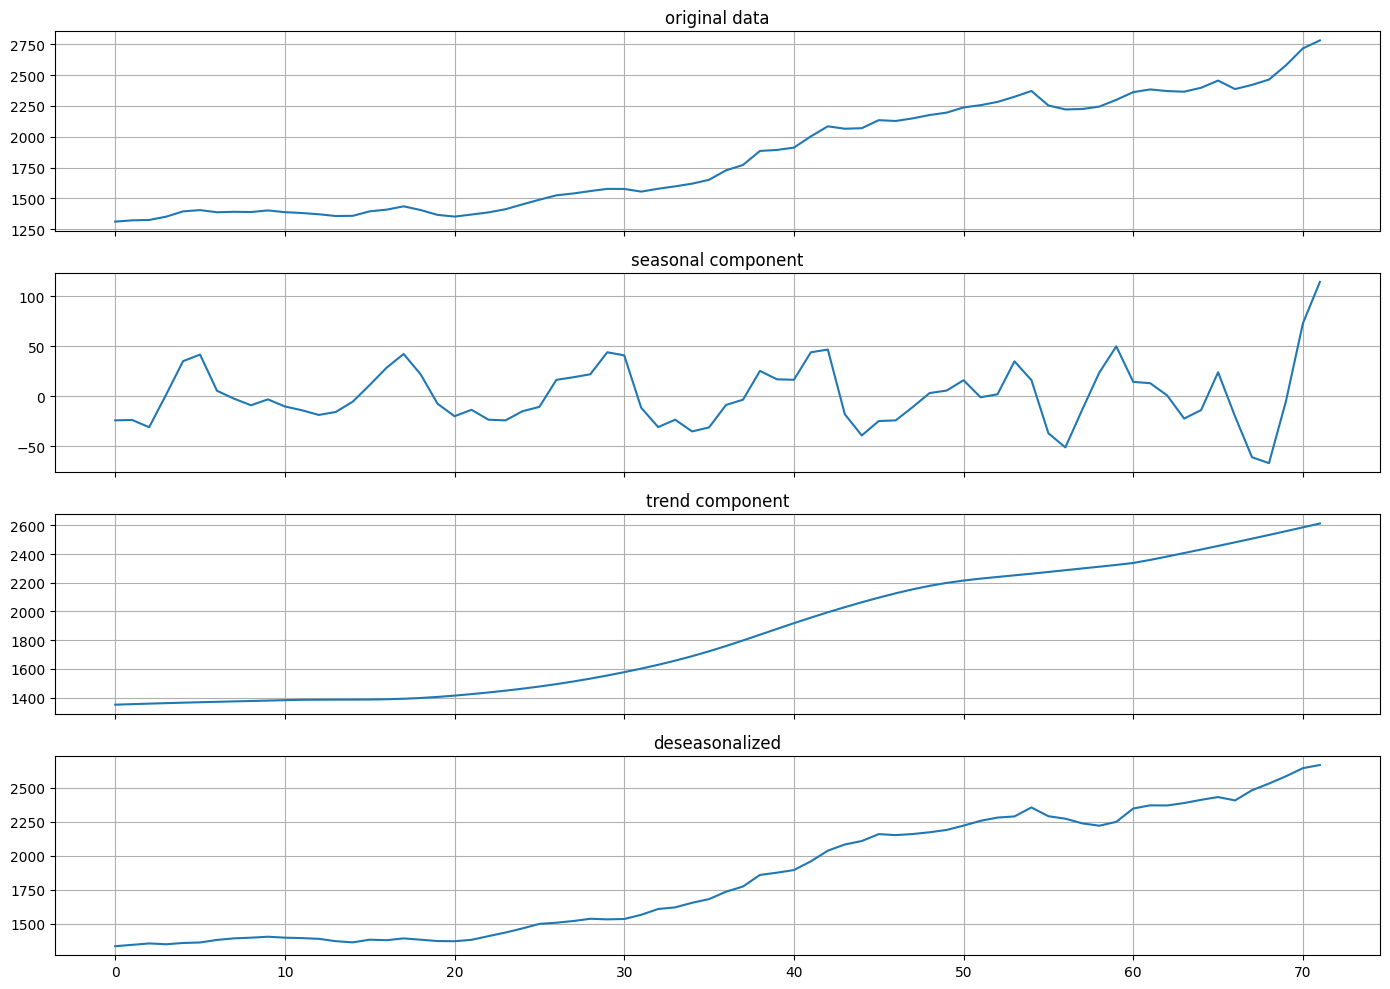

In [1221]:
stl = STL(df['basket_price'], period=12)
result = stl.fit()

df['seasonal'] = result.seasonal
df['trend'] = result.trend
# df['resid'] = result.resid
df['deseasonalized'] = df['basket_price'] - df['seasonal']



fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)
components = ['basket_price', 'seasonal', 'trend', 'deseasonalized']
titles = ['original data', 'seasonal component', 'trend component', 'deseasonalized']

for ax, comp, title in zip(axes, components, titles):
    ax.plot(df.index, df[comp], label=title)
    ax.set_title(title)
    ax.grid(True)

plt.tight_layout()
plt.show()


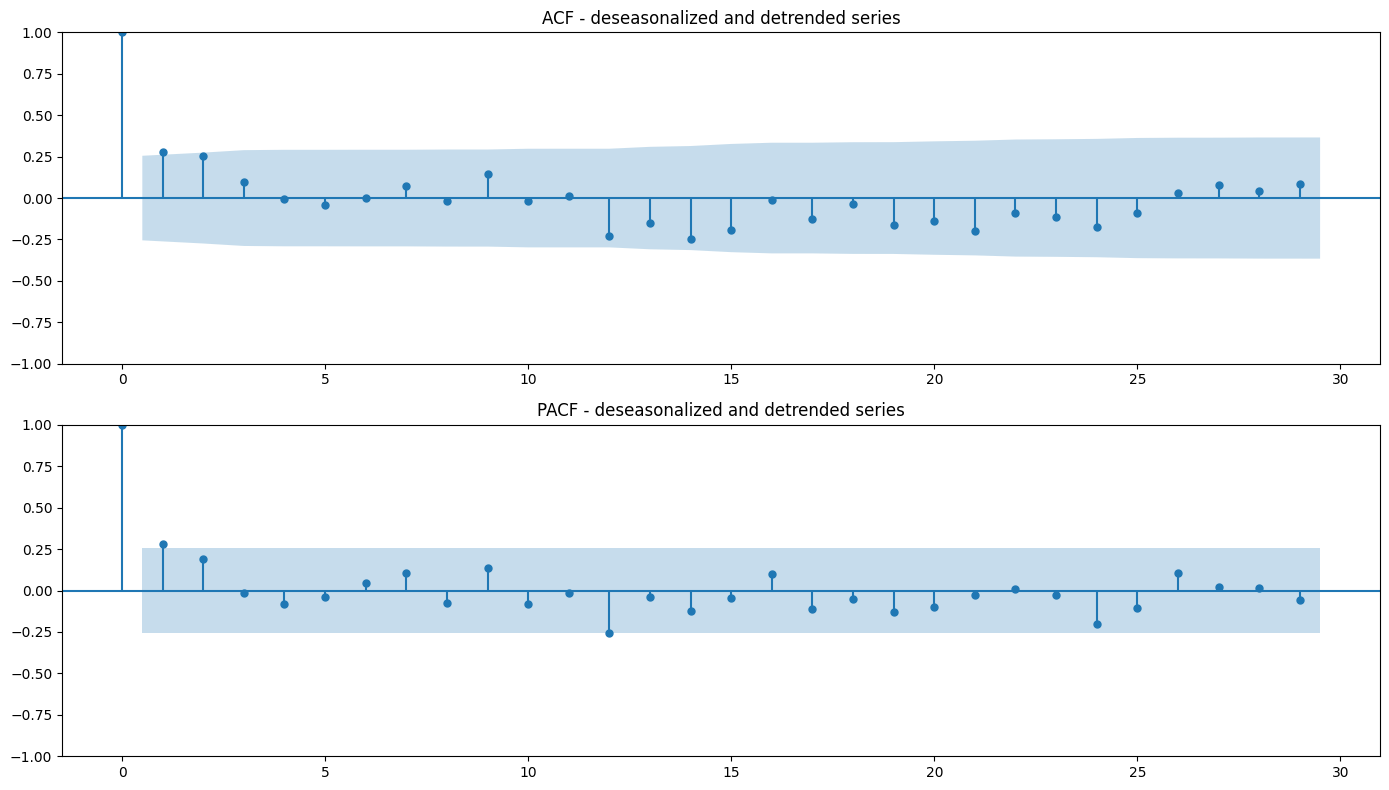

In [1222]:
df['deseasonalized'] = df["basket_price"].diff(12)

df['detrended'] = df['deseasonalized'].diff().dropna()

diff_series = df['detrended'].dropna()


fig, axes = plt.subplots(2, 1, figsize=(14, 8))
plot_acf(diff_series , ax=axes[0], lags=29)
axes[0].set_title('ACF - deseasonalized and detrended series')
plot_pacf(diff_series , ax=axes[1], lags=29, method='ywm')
axes[1].set_title('PACF - deseasonalized and detrended series')
plt.tight_layout()
plt.show()

In [1223]:
p = 1
q = 1
d = 0

model_opt = ARIMA(df['deseasonalized'], order=(p, d, q))
results_opt = model_opt.fit()

print(f"Optimal ARIMA({p},0,{q}) AIC: {results_opt.aic:.2f}")

model_202 = ARIMA(df['deseasonalized'], order=(2, 0, 2))
results_202 = model_202.fit()

print(f"ARIMA(2,0,2) AIC: {round(results_202.aic, 2)}")
results_opt.summary()


Optimal ARIMA(1,0,1) AIC: 642.52
ARIMA(2,0,2) AIC: 640.27


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         deseasonalized   No. Observations:                   72
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -317.262
Date:                Sun, 27 Apr 2025   AIC                            642.525
Time:                        14:49:59   BIC                            651.632
Sample:                             0   HQIC                           646.150
                                 - 72                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        220.5224    118.753      1.857      0.063     -12.230     453.274
ar.L1          0.9463      0.069     13.694      0.000       0.811       1.082
ma.L1          0.2270      0.142      1.602      0.109      -0.051       0.505
sigma2      2191.8346    333.803      6.566      0.000    1537.593    2846.077
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                35.06
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):              11.04   Skew:                             0.67
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Співвідношення заробітна плата/споживчий кошик (купівельна спроможність) залишається незмінним з плином часу. Тут можна зробити нову змінну - типу поділити зарплату на кошик і подивитись на тренд і тд

In [1224]:
saraly_df = pd.read_csv("salaries.csv")
df['salary'] = saraly_df['Salary']
df['basket_salary_ratio'] = df['basket_price'] / df['salary']


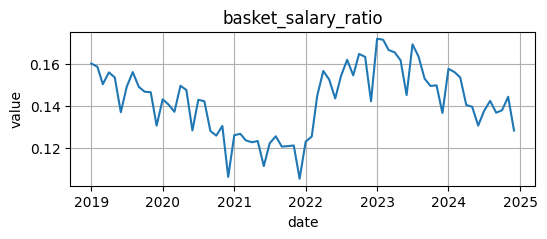

In [1225]:
plot_all_var(df, ['basket_salary_ratio'])

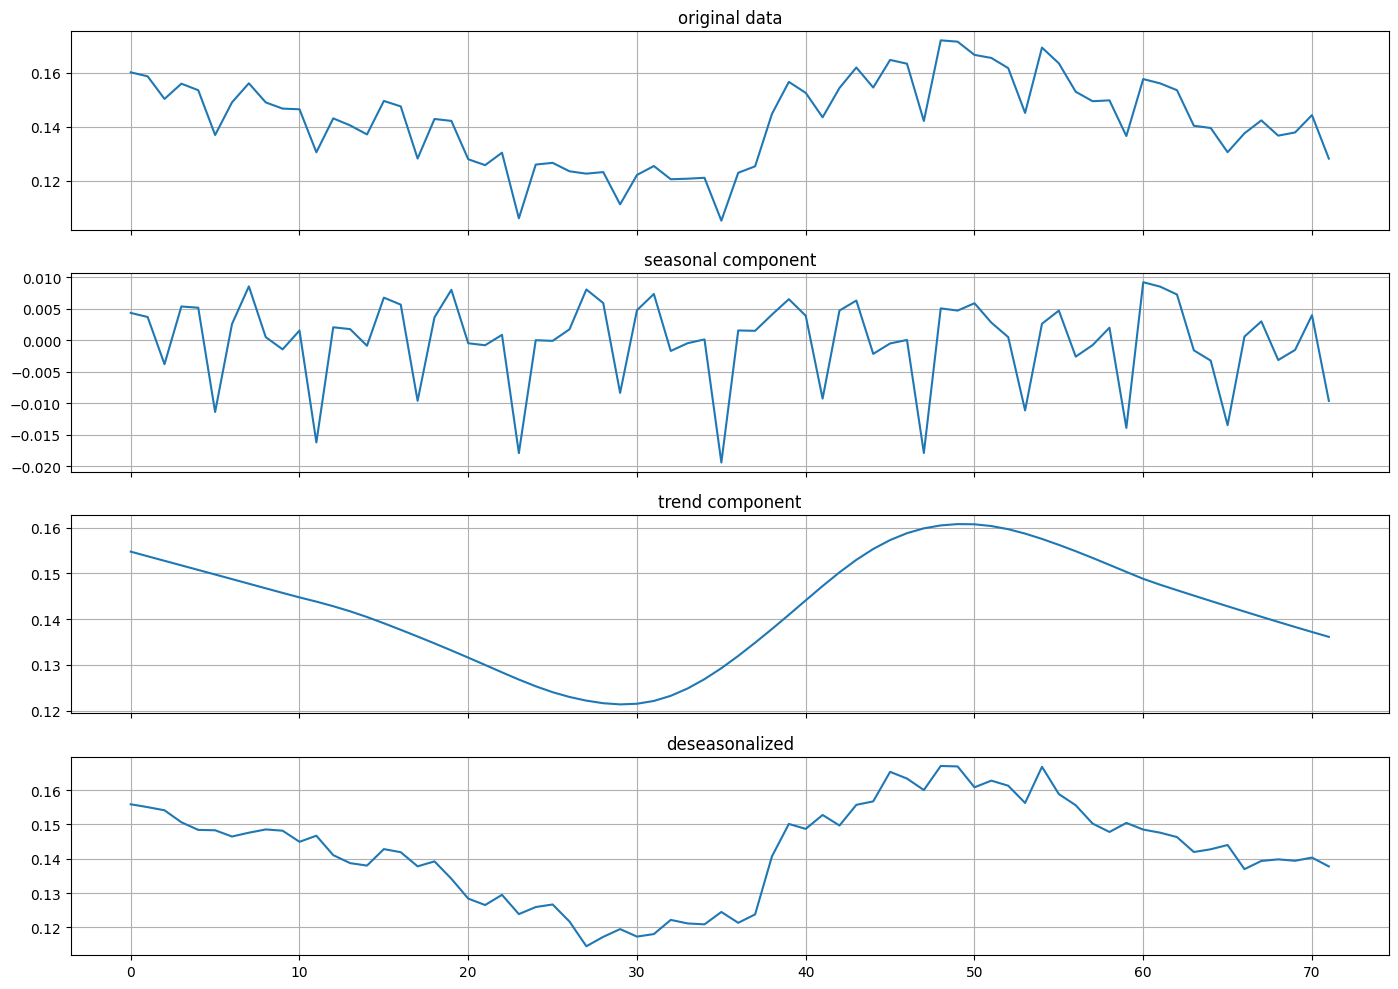

In [1226]:
stl = STL(df['basket_salary_ratio'], period=12)
result = stl.fit()

df['seasonal'] = result.seasonal
df['trend'] = result.trend
# df['resid'] = result.resid
df['deseasonalized'] = df['basket_salary_ratio'] - df['seasonal']



fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)
components = ['basket_salary_ratio', 'seasonal', 'trend', 'deseasonalized']
titles = ['original data', 'seasonal component', 'trend component', 'deseasonalized']

for ax, comp, title in zip(axes, components, titles):
    ax.plot(df.index, df[comp], label=title)
    ax.set_title(title)
    ax.grid(True)

plt.tight_layout()
plt.show()


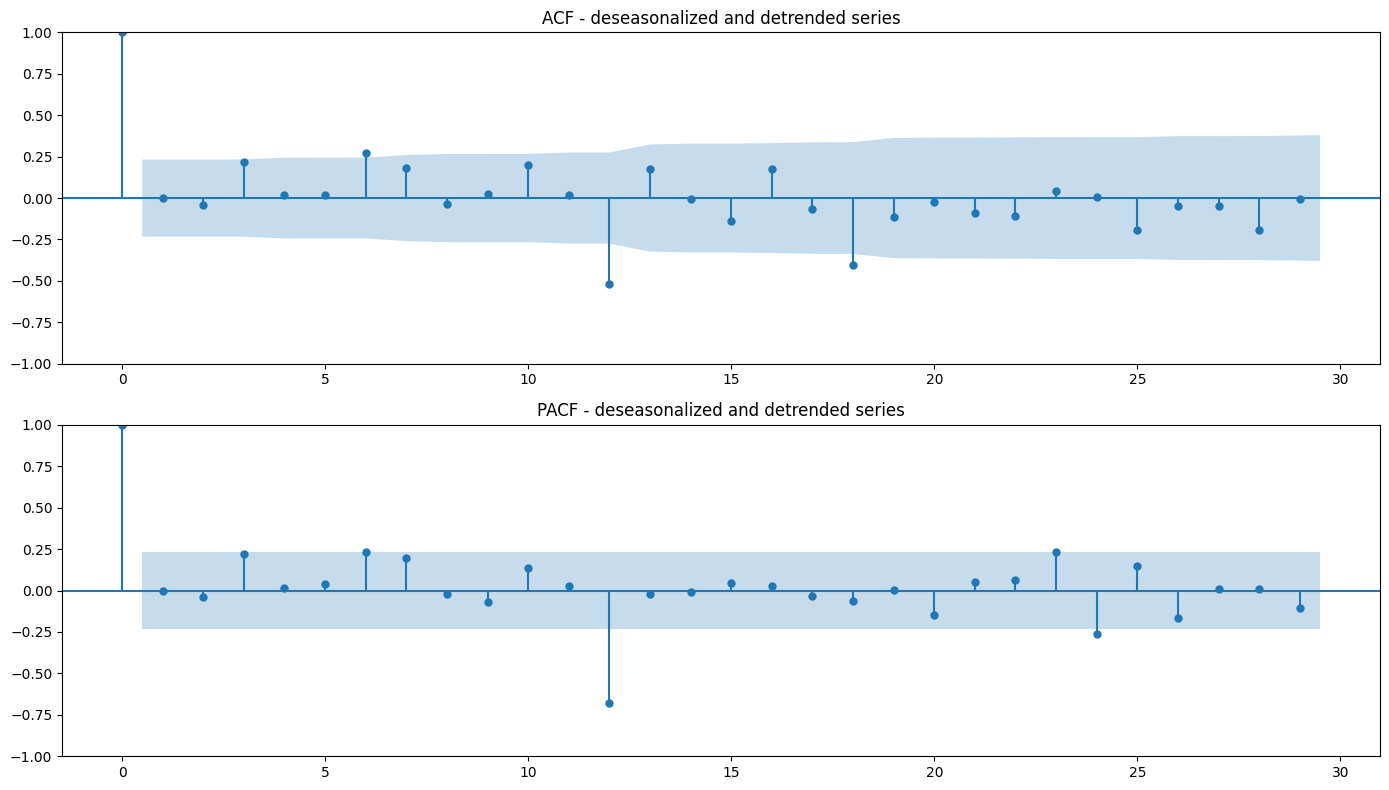

In [1227]:
df['detrended_b_s_ratio'] = df['deseasonalized'].diff().dropna()

diff_series = df['detrended_b_s_ratio'].dropna()


fig, axes = plt.subplots(2, 1, figsize=(14, 8))
plot_acf(diff_series , ax=axes[0], lags=29)
axes[0].set_title('ACF - deseasonalized and detrended series')
plot_pacf(diff_series , ax=axes[1], lags=29, method='ywm')
axes[1].set_title('PACF - deseasonalized and detrended series')
plt.tight_layout()
plt.show()

                            OLS Regression Results                            
Dep. Variable:           basket_price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     120.1
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           6.65e-37
Time:                        14:49:59   Log-Likelihood:                -420.10
No. Observations:                  72   AIC:                             868.2
Df Residuals:                      58   BIC:                             900.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            596.9731     21

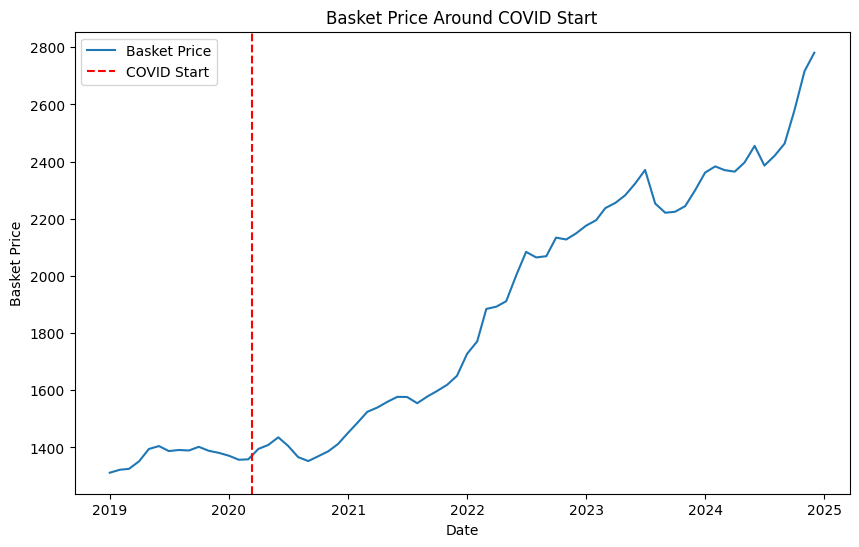

In [1228]:
# df['Місяць'] = pd.to_datetime(df['Місяць'])
# df = df.sort_values('Місяць')

# # Set COVID start date
# covid_start_date = pd.to_datetime('2020-03-11')

# # Define pre/post COVID
# df['post_covid'] = (df['Місяць'] >= covid_start_date).astype(int)

# # Assume all observations are 'treated' (because you have no control group), so we create a fake group
# df['treated'] = 1

# # Interaction term will be handled automatically in formula

# # Run DiD regression
# model = smf.ols('basket_price ~ post_covid * treated', data=df).fit()

# print(model.summary())

# # Plot the data
# plt.figure(figsize=(10,6))
# plt.plot(df['Місяць'], df['basket_price'], label='Basket Price')
# plt.axvline(x=covid_start_date, color='red', linestyle='--', label='COVID Start')
# plt.xlabel('Date')
# plt.ylabel('Basket Price')
# plt.title('Basket Price Around COVID Start')
# plt.legend()
# plt.show()


df['Місяць'] = pd.to_datetime(df['Місяць'])
df = df.sort_values('Місяць')

# Create time trend
df['time_index'] = range(len(df))

# Set COVID start date
covid_start_date = pd.to_datetime('2020-03-11')

# Define pre/post COVID
df['post_covid'] = (df['Місяць'] >= covid_start_date).astype(int)

# Assume all observations are treated
df['treated'] = 1

# Extract month number for seasonality
df['month_num'] = df['Місяць'].dt.month.astype('category')

# Run DiD regression with trend and seasonality
model = smf.ols('basket_price ~ post_covid * treated + time_index + C(month_num)', data=df).fit()

print(model.summary())

# Plot
plt.figure(figsize=(10,6))
plt.plot(df['Місяць'], df['basket_price'], label='Basket Price')
plt.axvline(x=covid_start_date, color='red', linestyle='--', label='COVID Start')
plt.xlabel('Date')
plt.ylabel('Basket Price')
plt.title('Basket Price Around COVID Start')
plt.legend()
plt.show()

нестаціонарні: молоко, молочні продукти, овочі, олія, сир, хліб

'Молоко пастеризоване жирністю до 2,6% включно'

'Молочні продукти'

'Овочі'

'Олія соняшникова'

'Хліб'

'Сир'



In [1229]:
df_detrend = pd.read_csv('basket_prices_corr.csv')
df_detrend['t'] = np.arange(len(df_detrend))

In [1230]:
def lin_trend(df, column):
    x_lin = df[['t']]
    y = df[column]
    model_lin = LinearRegression().fit(x_lin, y)
    df[f'trend_linear_{column}'] = model_lin.predict(x_lin)
    return df[f'trend_linear_{column}'] 
lin_trend_milk = lin_trend(df_detrend, 'Молоко пастеризоване жирністю до 2,6% включно')

In [1231]:
def quadratic_trend(df, column):
    x_quad = np.column_stack((df['t'], df['t']**2))
    y = df[column]
    model_quad = LinearRegression().fit(x_quad, y)
    df[f'trend_quadratic_{column}'] = model_quad.predict(x_quad)
    return df[f'trend_quadratic_{column}']
    
quadratic_trend_milk = quadratic_trend(df_detrend, 'Молоко пастеризоване жирністю до 2,6% включно')

In [1232]:
def expo_trend(df, column):
    x_lin = df[['t']]
    df[f'log_{column}'] = np.log(df[column])
    model_exp = LinearRegression().fit(x_lin, df[f'log_{column}'])
    df[f'trend_exponential_{column}'] = np.exp(model_exp.predict(x_lin))
    return df[f'trend_exponential_{column}']
    
expo_trend_milk = expo_trend(df_detrend, 'Молоко пастеризоване жирністю до 2,6% включно')

In [1233]:
df_detrend['detrended_linear_milk'] = df_detrend['Молоко пастеризоване жирністю до 2,6% включно'] - lin_trend_milk
df_detrend['detrended_quadratic_milk'] = df_detrend['Молоко пастеризоване жирністю до 2,6% включно'] - quadratic_trend_milk
df_detrend['detrended_exponential_milk'] = df_detrend['Молоко пастеризоване жирністю до 2,6% включно'] / expo_trend_milk

In [1234]:
for i, col in enumerate(['detrended_linear_milk', 'detrended_quadratic_milk', 'detrended_exponential_milk']):
   test_stationarity(df_detrend[col], col)


====DETRENDED_LINEAR_MILK====
ADF-test:
Test statistic: -0.8413803908647447
p-value: 0.8066637696157974
non-stationary

KPSS-test:
Test statistic: 0.27308867991354924
p-value: 0.1
stationary

====DETRENDED_QUADRATIC_MILK====
ADF-test:
Test statistic: -3.109022788235618
p-value: 0.025892627578770144
stationary

KPSS-test:
Test statistic: 0.11661954024760746
p-value: 0.1
stationary

====DETRENDED_EXPONENTIAL_MILK====
ADF-test:
Test statistic: -1.5221689222803894
p-value: 0.5225175813436171
non-stationary

KPSS-test:
Test statistic: 0.2326747359123892
p-value: 0.1
stationary


/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_97854/3535282707.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series_clean, regression='c', nlags="auto")
/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_97854/3535282707.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series_clean, regression='c', nlags="auto")
/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_97854/3535282707.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series_clean, regression='c', nlags="auto")


df_detrend['detrended_quadratic_milk'], df_detrend['detrended_quadratic_dairy'] -> this is stationar

In [1235]:
def detrend_function(df, col):
    df[f'detrended_linear_{col}'] = df[f'{col}'] - lin_trend(df, col)
    df[f'detrended_quadratic_{col}'] = df[f'{col}'] - quadratic_trend(df, col)
    df[f'detrended_exponential_{col}'] = df[f'{col}'] / expo_trend(df, col)


In [1236]:
detrend_function(df_detrend, 'Молочні продукти')

for i, col in enumerate(['detrended_linear_Молочні продукти', 'detrended_quadratic_Молочні продукти', 'detrended_exponential_Молочні продукти']):
   test_stationarity(df_detrend[col], col)


====DETRENDED_LINEAR_МОЛОЧНІ ПРОДУКТИ====
ADF-test:
Test statistic: -0.10714581429211985
p-value: 0.9487221149828111
non-stationary

KPSS-test:
Test statistic: 0.2935907138841937
p-value: 0.1
stationary

====DETRENDED_QUADRATIC_МОЛОЧНІ ПРОДУКТИ====
ADF-test:
Test statistic: -3.3101836648563356
p-value: 0.014429356088839171
stationary

KPSS-test:
Test statistic: 0.09423732915309002
p-value: 0.1
stationary

====DETRENDED_EXPONENTIAL_МОЛОЧНІ ПРОДУКТИ====
ADF-test:
Test statistic: -1.2706717445772138
p-value: 0.6424809669906327
non-stationary

KPSS-test:
Test statistic: 0.24429463036168123
p-value: 0.1
stationary


/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_97854/3535282707.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series_clean, regression='c', nlags="auto")
/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_97854/3535282707.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series_clean, regression='c', nlags="auto")
/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_97854/3535282707.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series_clean, regression='c', nlags="auto")


'Овочі' -> 'detrended_exponential_Овочі'

'Олія соняшникова' -> треба прибирати сезональність

'Хліб'  ->  'detrended_quadratic_Хліб'

'Сир' -> -> треба прибирати сезональність


In [1237]:
detrend_function(df_detrend, 'Овочі')

for i, col in enumerate(['detrended_linear_Овочі', 'detrended_quadratic_Овочі', 'detrended_exponential_Овочі']):
   test_stationarity(df_detrend[col], col)


====DETRENDED_LINEAR_ОВОЧІ====
ADF-test:
Test statistic: -2.3764628757176465
p-value: 0.1484900749109762
non-stationary

KPSS-test:
Test statistic: 0.12040772967404746
p-value: 0.1
stationary

====DETRENDED_QUADRATIC_ОВОЧІ====
ADF-test:
Test statistic: -2.3718004548466056
p-value: 0.1498541919513588
non-stationary

KPSS-test:
Test statistic: 0.12136981062782207
p-value: 0.1
stationary

====DETRENDED_EXPONENTIAL_ОВОЧІ====
ADF-test:
Test statistic: -3.6036306048513578
p-value: 0.0056919965173163126
stationary

KPSS-test:
Test statistic: 0.11570210791246202
p-value: 0.1
stationary


/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_97854/3535282707.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series_clean, regression='c', nlags="auto")
/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_97854/3535282707.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series_clean, regression='c', nlags="auto")
/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_97854/3535282707.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series_clean, regression='c', nlags="auto")


In [1238]:
detrend_function(df_detrend, 'Олія соняшникова')

for i, col in enumerate(['detrended_linear_Олія соняшникова', 'detrended_quadratic_Олія соняшникова', 'detrended_exponential_Олія соняшникова']):
   test_stationarity(df_detrend[col], col)


====DETRENDED_LINEAR_ОЛІЯ СОНЯШНИКОВА====
ADF-test:
Test statistic: -2.7775292112666303
p-value: 0.06155594187568833
non-stationary

KPSS-test:
Test statistic: 0.22898359038499477
p-value: 0.1
stationary

====DETRENDED_QUADRATIC_ОЛІЯ СОНЯШНИКОВА====
ADF-test:
Test statistic: -2.8004740440758993
p-value: 0.058206086145616016
non-stationary

KPSS-test:
Test statistic: 0.11002429091872012
p-value: 0.1
stationary

====DETRENDED_EXPONENTIAL_ОЛІЯ СОНЯШНИКОВА====
ADF-test:
Test statistic: -2.079288611850111
p-value: 0.2529238865646878
non-stationary

KPSS-test:
Test statistic: 0.23970567731614822
p-value: 0.1
stationary


/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_97854/3535282707.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series_clean, regression='c', nlags="auto")
/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_97854/3535282707.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series_clean, regression='c', nlags="auto")
/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_97854/3535282707.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series_clean, regression='c', nlags="auto")


In [1239]:
detrend_function(df_detrend, 'Хліб')

for i, col in enumerate(['detrended_linear_Хліб', 'detrended_quadratic_Хліб', 'detrended_exponential_Хліб']):
   test_stationarity(df_detrend[col], col)


====DETRENDED_LINEAR_ХЛІБ====
ADF-test:
Test statistic: -2.386785156391215
p-value: 0.14550099055714322
non-stationary

KPSS-test:
Test statistic: 0.15734153955414318
p-value: 0.1
stationary

====DETRENDED_QUADRATIC_ХЛІБ====
ADF-test:
Test statistic: -3.2941949537147726
p-value: 0.015139962741762191
stationary

KPSS-test:
Test statistic: 0.12659468142502364
p-value: 0.1
stationary

====DETRENDED_EXPONENTIAL_ХЛІБ====
ADF-test:
Test statistic: -3.3934426081503313
p-value: 0.011184454193761276
stationary

KPSS-test:
Test statistic: 0.13638200122480423
p-value: 0.1
stationary


/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_97854/3535282707.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series_clean, regression='c', nlags="auto")
/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_97854/3535282707.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series_clean, regression='c', nlags="auto")
/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_97854/3535282707.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series_clean, regression='c', nlags="auto")


In [1240]:
detrend_function(df_detrend, 'Сир')

for i, col in enumerate(['detrended_linear_Сир', 'detrended_quadratic_Сир', 'detrended_exponential_Сир']):
   test_stationarity(df_detrend[col], col)


====DETRENDED_LINEAR_СИР====
ADF-test:
Test statistic: -0.7530550378230076
p-value: 0.8325245239594692
non-stationary

KPSS-test:
Test statistic: 0.26846396775642506
p-value: 0.1
stationary

====DETRENDED_QUADRATIC_СИР====
ADF-test:
Test statistic: -2.1821766329167924
p-value: 0.21277778631714567
non-stationary

KPSS-test:
Test statistic: 0.09725737847259908
p-value: 0.1
stationary

====DETRENDED_EXPONENTIAL_СИР====
ADF-test:
Test statistic: -1.5446770500081697
p-value: 0.5113059709652402
non-stationary

KPSS-test:
Test statistic: 0.19764535066406472
p-value: 0.1
stationary


/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_97854/3535282707.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series_clean, regression='c', nlags="auto")
/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_97854/3535282707.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series_clean, regression='c', nlags="auto")
/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_97854/3535282707.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series_clean, regression='c', nlags="auto")




'Олія соняшникова' -> 'first_diff_deseasonalized_Олія соняшникова'

'Сир' -> -> треба прибирати сезональність (ДЕБІЛ, тупе дибіляче)


In [1241]:
def remove_season(df, col):
    stl = STL(df[col], period=12)
    result = stl.fit()
    df[f'seasonal_{col}'] = result.seasonal
    df[f'deseasonalized_{col}'] = df[col] - df[f'seasonal_{col}']
    return df[f'deseasonalized_{col}'] 



In [1242]:

remove_season(df_detrend, 'Олія соняшникова')
df_detrend['first_diff_deseasonalized_Олія соняшникова'] = df_detrend['deseasonalized_Олія соняшникова'].diff()

for i, col in enumerate(['first_diff_deseasonalized_Олія соняшникова']):
   test_stationarity(df_detrend[col], col)


====FIRST_DIFF_DESEASONALIZED_ОЛІЯ СОНЯШНИКОВА====
ADF-test:
Test statistic: -3.453548019481917
p-value: 0.009263364969207223
stationary

KPSS-test:
Test statistic: 0.19750225112080066
p-value: 0.1
stationary


/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_97854/3535282707.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series_clean, regression='c', nlags="auto")


In [1243]:
remove_season(df_detrend, 'Сир')

df_detrend['first_diff_deseasonalized_Сир'] = df_detrend['deseasonalized_Сир'].pct_change()

for i, col in enumerate(['first_diff_deseasonalized_Сир']):
   test_stationarity(df_detrend[col], col)


====FIRST_DIFF_DESEASONALIZED_СИР====
ADF-test:
Test statistic: -1.8851672538841961
p-value: 0.3390707512381401
non-stationary

KPSS-test:
Test statistic: 0.4098504537801026
p-value: 0.07290928716374888
stationary


here i make i new dataset only with stational data

In [1244]:
cpi_df = pd.read_csv('monthly_cpi_2019_2024.csv')

In [1245]:
# stationar_data = df[['first_diff_Картопля', 'first_diff_Ковбасні вироби', 'first_diff_Крупи', 'first_diff_Мʼясо свійських тварин та птиці', 'first_diff_Макарони']]
stationar_data = df[['Місяць']]
# stationar_data['Картопля'] = round(df['first_diff_Картопля'], 2) 
# stationar_data['Ковбасні вироби'] = df['first_diff_Ковбасні вироби']
# stationar_data['Крупи'] = df['first_diff_Крупи']
# stationar_data['Мʼясо свійських тварин та птиці'] = df['first_diff_Мʼясо свійських тварин та птиці']
# stationar_data['Макарони'] = df['first_diff_Макарони']
# stationar_data['Молоко'] = df_detrend['detrended_quadratic_milk']
# stationar_data['Молочні продукти'] = df_detrend['detrended_quadratic_Молочні продукти']
# stationar_data['Овочі'] = df_detrend['detrended_exponential_Овочі']
# stationar_data['Олія соняшникова'] = df_detrend['first_diff_deseasonalized_Олія соняшникова']
# stationar_data['Риба'] = df['first_diff_Риба']
# stationar_data['Сир'] = df['first_diff_Сир']
# stationar_data['Хліб'] = df_detrend['detrended_quadratic_Хліб']
# stationar_data['Цукор'] = df['first_diff_Цукор']
# stationar_data['Яблука'] = df['first_diff_Яблука']
# stationar_data['Яйця'] = df['first_diff_Яйця']
# stationar_data['basket_price'] = df['first_diff_basket_price']

stationar_data['Картопля'] = round(df['first_diff_Картопля'], 2)
stationar_data['Ковбасні вироби'] = round(df['first_diff_Ковбасні вироби'], 2)
stationar_data['Крупи'] = round(df['first_diff_Крупи'], 2)
stationar_data['Мʼясо свійських тварин та птиці'] = round(df['first_diff_Мʼясо свійських тварин та птиці'], 2)
stationar_data['Макарони'] = round(df['first_diff_Макарони'], 2)
stationar_data['Молоко'] = round(df_detrend['detrended_quadratic_milk'], 2)
stationar_data['Молочні продукти'] = round(df_detrend['detrended_quadratic_Молочні продукти'], 2)
stationar_data['Овочі'] = round(df_detrend['detrended_exponential_Овочі'], 2)
stationar_data['Олія соняшникова'] = round(df_detrend['first_diff_deseasonalized_Олія соняшникова'], 2)
stationar_data['Риба'] = round(df['first_diff_Риба'], 2)
stationar_data['Сир'] = round(df['first_diff_Сир'], 2)
stationar_data['Хліб'] = round(df_detrend['detrended_quadratic_Хліб'], 2)
stationar_data['Цукор'] = round(df['first_diff_Цукор'], 2)
stationar_data['Яблука'] = round(df['first_diff_Яблука'], 2)
stationar_data['Яйця'] = round(df['first_diff_Яйця'], 2)
stationar_data['basket_price'] = round(df['first_diff_basket_price'], 2)
stationar_data['index'] = cpi_df['Індекс']


stationar_data.to_csv('stationar_data_null.csv')

/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_97854/4260991561.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stationar_data['Картопля'] = round(df['first_diff_Картопля'], 2)
/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_97854/4260991561.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stationar_data['Ковбасні вироби'] = round(df['first_diff_Ковбасні вироби'], 2)
/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_97854/4260991561.py:22: SettingWithCopyWarning: 
A 

In [1246]:
stat_df = pd.read_csv('stationar_data_null.csv')
stat_df = stat_df.drop(columns=['Unnamed: 0'])
stat_df = stat_df.dropna()
stat_df.to_csv("stationary_clean.csv")
stat_df.isna().sum()

Місяць                             0
Картопля                           0
Ковбасні вироби                    0
Крупи                              0
Мʼясо свійських тварин та птиці    0
Макарони                           0
Молоко                             0
Молочні продукти                   0
Овочі                              0
Олія соняшникова                   0
Риба                               0
Сир                                0
Хліб                               0
Цукор                              0
Яблука                             0
Яйця                               0
basket_price                       0
index                              0
dtype: int64

In [1247]:

df_stat = stat_df.copy()
y = df_stat['basket_price']

# 2. Define predictors (all other product columns)
X = df_stat.drop(columns=['Місяць', 'basket_price', 'index'])  # Drop date and target

# 3. Add a constant (intercept) to the model
X = sm.add_constant(X)

# 4. Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# 5. Show the model summary
print(results.summary())

# 6. See sorted coefficients (absolute value)
coef = results.params.drop('const').abs().sort_values(ascending=False)
print("\nProducts influence on basket price (sorted):")
print(coef)

                            OLS Regression Results                            
Dep. Variable:           basket_price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     56.41
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           7.43e-28
Time:                        14:50:00   Log-Likelihood:                -261.61
No. Observations:                  71   AIC:                             555.2
Df Residuals:                      55   BIC:                             591.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [1248]:

y_cpi = df_stat['index']

# 2. Define predictors (all other product columns)
X = df_stat.drop(columns=['Місяць', 'basket_price', 'index'])  # Drop date and target

# 3. Add a constant (intercept) to the model
X = sm.add_constant(X)

# 4. Fit the OLS model
model_cpi = sm.OLS(y_cpi , X)
results = model_cpi.fit()

# 5. Show the model summary
print(results.summary())

# 6. See sorted coefficients (absolute value)
coef = results.params.drop('const').abs().sort_values(ascending=False)
print("\nProducts influence on basket price (sorted):")
print(coef)

                            OLS Regression Results                            
Dep. Variable:                  index   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     6.188
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           2.39e-07
Time:                        14:51:07   Log-Likelihood:                -46.272
No. Observations:                  71   AIC:                             124.5
Df Residuals:                      55   BIC:                             160.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     